In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import os

In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
train_dir = r'C:\Users\aishw\OneDrive\Documents\Practice\CNN\train'
valid_dir = r'C:\Users\aishw\OneDrive\Documents\Practice\CNN\validation'
test_dir = r'C:\Users\aishw\OneDrive\Documents\Practice\CNN\test'

### Data Preprocessing

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator 

In [5]:
# Generating batches of tensor image data
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255) # converting image from RGB scale to 0 to 1 scale

train_generator = train_datagen.flow_from_directory(train_dir,
            target_size=(150,150),batch_size =20,class_mode = 'binary')
valid_generator = test_datagen.flow_from_directory(valid_dir,
            target_size=(150,150),batch_size =20,class_mode = 'binary')


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [6]:
from tensorflow.keras import layers
from tensorflow.keras import models

In [7]:
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape = (150,150,3)))
model.add(layers.MaxPooling2D((2,2))) # 2*2 window
# first layer will have 32 filters with 3*3 window with input size of 150,150
# as our target is 150,150 and 3 is for 3 dim. as the images are in RGB format.

model.add(layers.Conv2D(64,(3,3),activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(128,(3,3),activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(128,(3,3),activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())

model.add(layers.Dense(512, activation='relu'))

model.add(layers.Dense(1,activation='sigmoid'))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [9]:
from tensorflow.keras import optimizers
model.compile(loss = 'binary_crossentropy',
             optimizer = optimizers.RMSprop(lr=1e-4),
             metrics = ['acc'])

In [10]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,epochs=20,
    validation_data = valid_generator,
    validation_steps = 50)
# steps per epoch = (number of total images)/(number of images in each batch)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/20
100/100 [==============================] - 169s 2s/step - loss: 0.6891 - acc: 0.5385 - val_loss: 0.6711 - val_acc: 0.5700
Epoch 2/20
100/100 [==============================] - 130s 1s/step - loss: 0.6579 - acc: 0.6035 - val_loss: 0.6305 - val_acc: 0.6330
Epoch 3/20
100/100 [==============================] - 127s 1s/step - loss: 0.6047 - acc: 0.6720 - val_loss: 0.6060 - val_acc: 0.6840
Epoch 4/20
100/100 [==============================] - 129s 1s/step - loss: 0.5601 - acc: 0.7220 - val_loss: 0.6821 - val_acc: 0.6100
Epoch 5/20
100/100 [==============================] - 127s 1s/step - loss: 0.5322 - acc: 0.7255 - val_loss: 0.5845 - val_acc: 0.6810
Epoch 6/20
100/100 [==============================] - 127s 1s/step - loss: 0.5071 - acc: 0.7475 - val_loss: 0.5791 - val_acc: 0.6810
Epoch 7/20
100/100 [==============================] - 127s 1s/step - loss: 0.4730 - acc: 0.7810 - val_loss: 0.5962 - val_acc: 

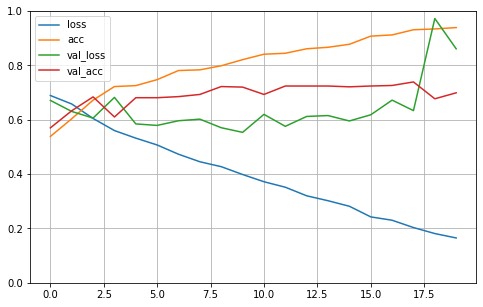

In [11]:
pd.DataFrame(history.history).plot(figsize = (8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [12]:
model.save("model.h5")

In [13]:
from tensorflow.keras import backend as k
k.clear_session()
del model

## DATA AUGMENTATION PREPROCESSING

In [14]:
train_datagen = ImageDataGenerator(
              rescale = 1./255,rotation_range = 40,width_shift_range=0.2,
              height_shift_range = 0.2, shear_range = 0.2, zoom_range = 0.2,
              horizontal_flip = True) # 0.2 =  shifting 20% of each image by width,height,zoom,etc.

test_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
            target_size=(150,150),batch_size =32,class_mode = 'binary')
valid_generator = test_datagen.flow_from_directory(valid_dir,
            target_size=(150,150),batch_size =32,class_mode = 'binary')


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [15]:
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',
                        input_shape = (150,150,3)))
model.add(layers.MaxPooling2D((2,2))) # 2*2 window
# first layer will have 32 filters with 3*3 window with input size of 150,150
# as our target is 150,150 and 3 is for 3 dim. as the images are in RGB format.

model.add(layers.Conv2D(64,(3,3),activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(128,(3,3),activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(128,(3,3),activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [17]:
model.compile(loss = 'binary_crossentropy',
             optimizer = optimizers.RMSprop(lr=1e-4),
             metrics = ['acc'])

In [18]:
history = model.fit_generator(
    train_generator,steps_per_epoch=100,epochs=100,
    validation_data = valid_generator,
    validation_steps = 50)

Epoch 1/100
 52/100 [==============>...............] - ETA: 1:27 - loss: 0.6944 - acc: 0.5174

KeyboardInterrupt: 

In [ ]:
pd.DataFrame(history.history).plot(figsize = (8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [ ]:
model.save("cat&dog_aug.h5")

## ILSVRC : ImageNet Large Scale Visual Recognition Challenge

### VGG16

In [19]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator( rescale = 1./255, # convert RGB values from 0 to 255 to 0 to 1
                                  rotation_range=40,
                                  width_shift_range = 0.2,
                                  height_shift_range =0.2,
                                  shear_range = 0.2,
                                  zoom_range = 0.2,
                                  horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)
train_generator = train_datagen.flow_from_directory(
                train_dir,
                target_size = (150,150),
                batch_size = 20,
                class_mode = 'binary')
validation_generator = train_datagen.flow_from_directory(
                valid_dir,
                target_size = (150,150),
                batch_size = 20,
                class_mode = 'binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [22]:
from tensorflow.keras.applications import VGG16
conv_base = VGG16(weights = "imagenet", include_top = False, input_shape = (150,150,3))

58892288/58889256 [==============================] - 74s 1us/step


In [23]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [27]:
from tensorflow.keras import models
from tensorflow.keras import layers
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation = "relu"))
model.add(layers.Dense(1, activation = "sigmoid"))

In [28]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


In [29]:
conv_base.trainable = False

In [33]:
from tensorflow.keras import optimizers
model.compile(loss = 'binary_crossentropy',
             optimizer = optimizers.RMSprop(lr=2e-5),
             metrics = ['acc'])

In [34]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("CNN_C&D_model-{epoch:02d}.h5")

In [35]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,epochs=20,
    validation_data = valid_generator,
    validation_steps = 50,
    callbacks = [checkpoint_cb])

Epoch 1/20
100/100 [==============================] - 597s 6s/step - loss: 0.4749 - acc: 0.7750 - val_loss: 0.3743 - val_acc: 0.8430
Epoch 2/20
100/100 [==============================] - 602s 6s/step - loss: 0.4317 - acc: 0.8035 - val_loss: 0.3571 - val_acc: 0.8510
Epoch 3/20
 37/100 [==========>...................] - ETA: 4:11 - loss: 0.4072 - acc: 0.8270

KeyboardInterrupt: 

In [ ]:
pd.DataFrame(history.history).plot(figsize = (8.5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [ ]:
hist_df = pd.DataFrame(history.history)

In [ ]:
hist_csv_file = "history.csv"
with open(hist_csv_file , mode ='w') as f:
    hist_df.to.csv(f)

In [ ]:
test_generator = test_datagen.flow_from_directory(
                test_dir,
                target_size = (150,150),
                batch_size = 20,
                class_mode = 'binary')

In [ ]:
model.evaluate_generator(test_generator, steps =50)